In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg

In [2]:
df=pd.read_csv(r"C:\Users\user\Desktop\monthly_csv.csv",usecols=[1,2],index_col=0,parse_dates=True)

In [3]:
x=df.values

In [4]:
df

,Mean
Date,
2016-12-06,0.7895
2016-12-06,0.8100
2016-11-06,0.7504
2016-11-06,0.9300
2016-10-06,0.7292
...,...
1880-03-06,-0.1800
1880-02-06,-0.1229
1880-02-06,-0.2100


In [5]:
df.shape

(3288, 1)

In [6]:
print(x)

[[ 0.7895]
 [ 0.81  ]
 [ 0.7504]
 ...
 [-0.21  ]
 [ 0.0009]
 [-0.3   ]]


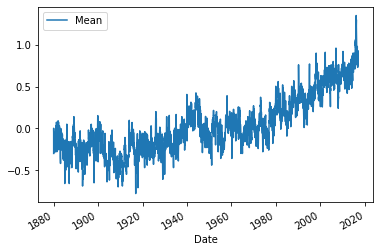

In [7]:
df.plot()

Check for stationary

In [8]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df['Mean'],autolag='AIC')
print("1. ADF: ",dftest[0])
print("2. P-value:",dftest[1])
print("3. Num Of Lags:",dftest[2])
print("4. Num of observations used for ADF Regression and Critical Values Calculation:",dftest[3])
print("5. Critical Values:")
for key,val in dftest[4].items():
    print("\\t",key,":",val)

1. ADF:  -3.4267386337522208
2. P-value: 0.010080432666759247
3. Num Of Lags: 28
4. Num of observations used for ADF Regression and Critical Values Calculation: 3259
5. Critical Values:
\t 1% : -3.4323581184837426
\t 5% : -2.862427266935068
\t 10% : -2.5672423111140947


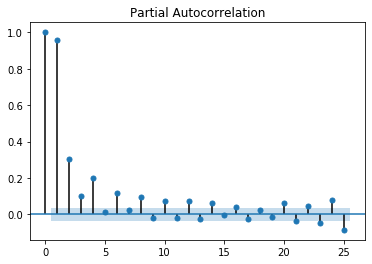

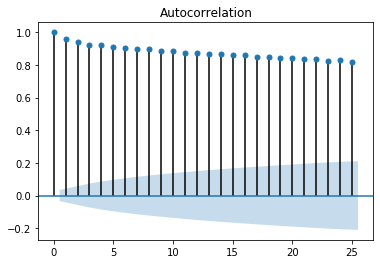

In [9]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
pacf=plot_pacf(df['Mean'],lags=25)
acf=plot_acf(df['Mean'],lags=25)

split data into train and test : Testing last 7 days

In [10]:
train=x[:len(x)-7]
test=x[len(x)-7:]

In [11]:
model=AutoReg(train,lags=5).fit()

In [12]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 3281
Model:                     AutoReg(5)   Log Likelihood                3256.869
Method:               Conditional MLE   S.D. of innovations              0.090
Date:                Wed, 03 Aug 2022   AIC                             -4.822
Time:                        22:44:05   BIC                             -4.809
Sample:                             5   HQIC                            -4.817
                                 3281                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0003      0.002      0.203      0.839      -0.003       0.003
y.L1           0.6109      0.017     34.974      0.000       0.577       0.645
y.L2           0.1834      0.020      9.099      0.0

Make prediction on test set and compare

In [16]:
pred=model.predict(start=len(train),end=len(x)-1,dynamic=False)

[-0.1137584  -0.0929044  -0.10473131 -0.08922562 -0.0940149  -0.09047382
 -0.09171223]


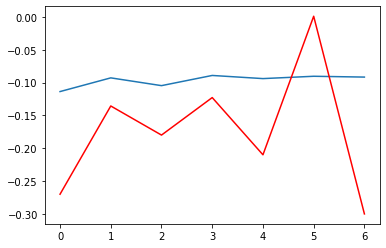

In [17]:
pyplot.plot(pred)
pyplot.plot(test,color="red")
print(pred)


Calculate error

In [18]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse=sqrt(mean_squared_error(test,pred))

In [19]:
print(rmse)

0.1184590059000786


Making Future Prediction

In [23]:
pred_future=model.predict(start=len(x)+1,end=len(x)+7,dynamic=False)
print(pred_future)
print(len(pred_future))

[-0.1137584  -0.0929044  -0.10473131 -0.08922562 -0.0940149  -0.09047382
 -0.09171223 -0.08875323 -0.08801747 -0.08634957 -0.08548045 -0.08409285
 -0.08294749 -0.0816765  -0.08053467]
15
